<h3>Exploring the NZV, Normalization and Standartizing</h3>

In [115]:
# importing dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import normalize

diabetes = pd.read_csv ("diabetes.csv")

In [116]:
print(diabetes.shape)
print(diabetes.describe(include='all'))

(70692, 22)
       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       

In [117]:
# Near-zero variance

from sklearn.feature_selection import VarianceThreshold

tr= VarianceThreshold(threshold=0.1)

tr.fit(diabetes) # applying threshold

feature_nzv=tr.get_support(indices=True) #getting indices with no nzv features
data_nzv=diabetes.columns[feature_nzv] # getting column names.
data_p_nzv=diabetes[data_nzv] # filtered data.

data_p_nzv.shape



(70692, 17)

In [118]:
# what variables have been dropped.
diabetes.columns.drop(data_nzv)

Index(['CholCheck', 'Stroke', 'HvyAlcoholConsump', 'AnyHealthcare',
       'NoDocbcCost'],
      dtype='object')

Removed variables:
- CholCheck
- Stroke
- HvyAlcholConsump
- AnyHealthcare
- NoDocbcCost

the dataset after the removel is data_p_nzv referring to data past nzv.

<h3>Removing outliers for BMI, PhysHlth and MentHlth</h3>

<Axes: >

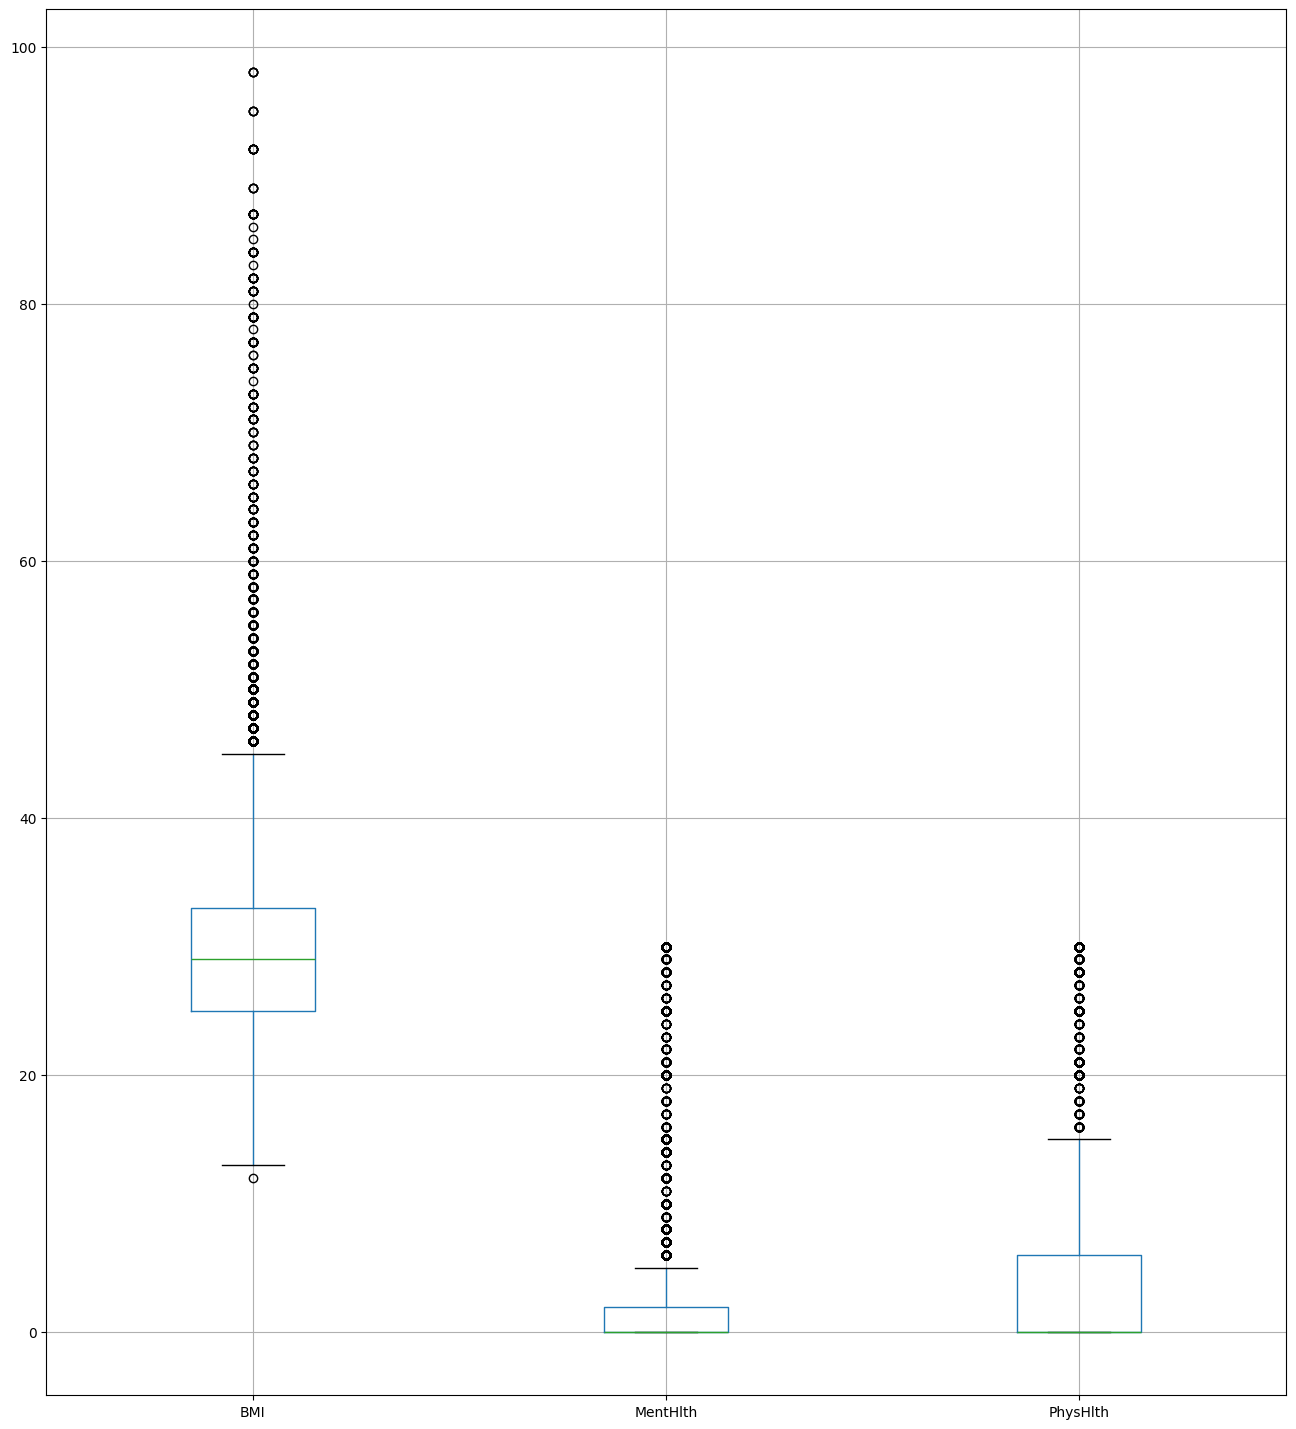

In [119]:
plt.figure(figsize=(16, 18))
data_p_nzv[['BMI','MentHlth','PhysHlth']].boxplot()

In [120]:
# Defining variables
bmi_col = data_p_nzv['BMI'].copy()
ph_col = data_p_nzv['PhysHlth'].copy()
mh_col = data_p_nzv['MentHlth'].copy()

<Axes: >

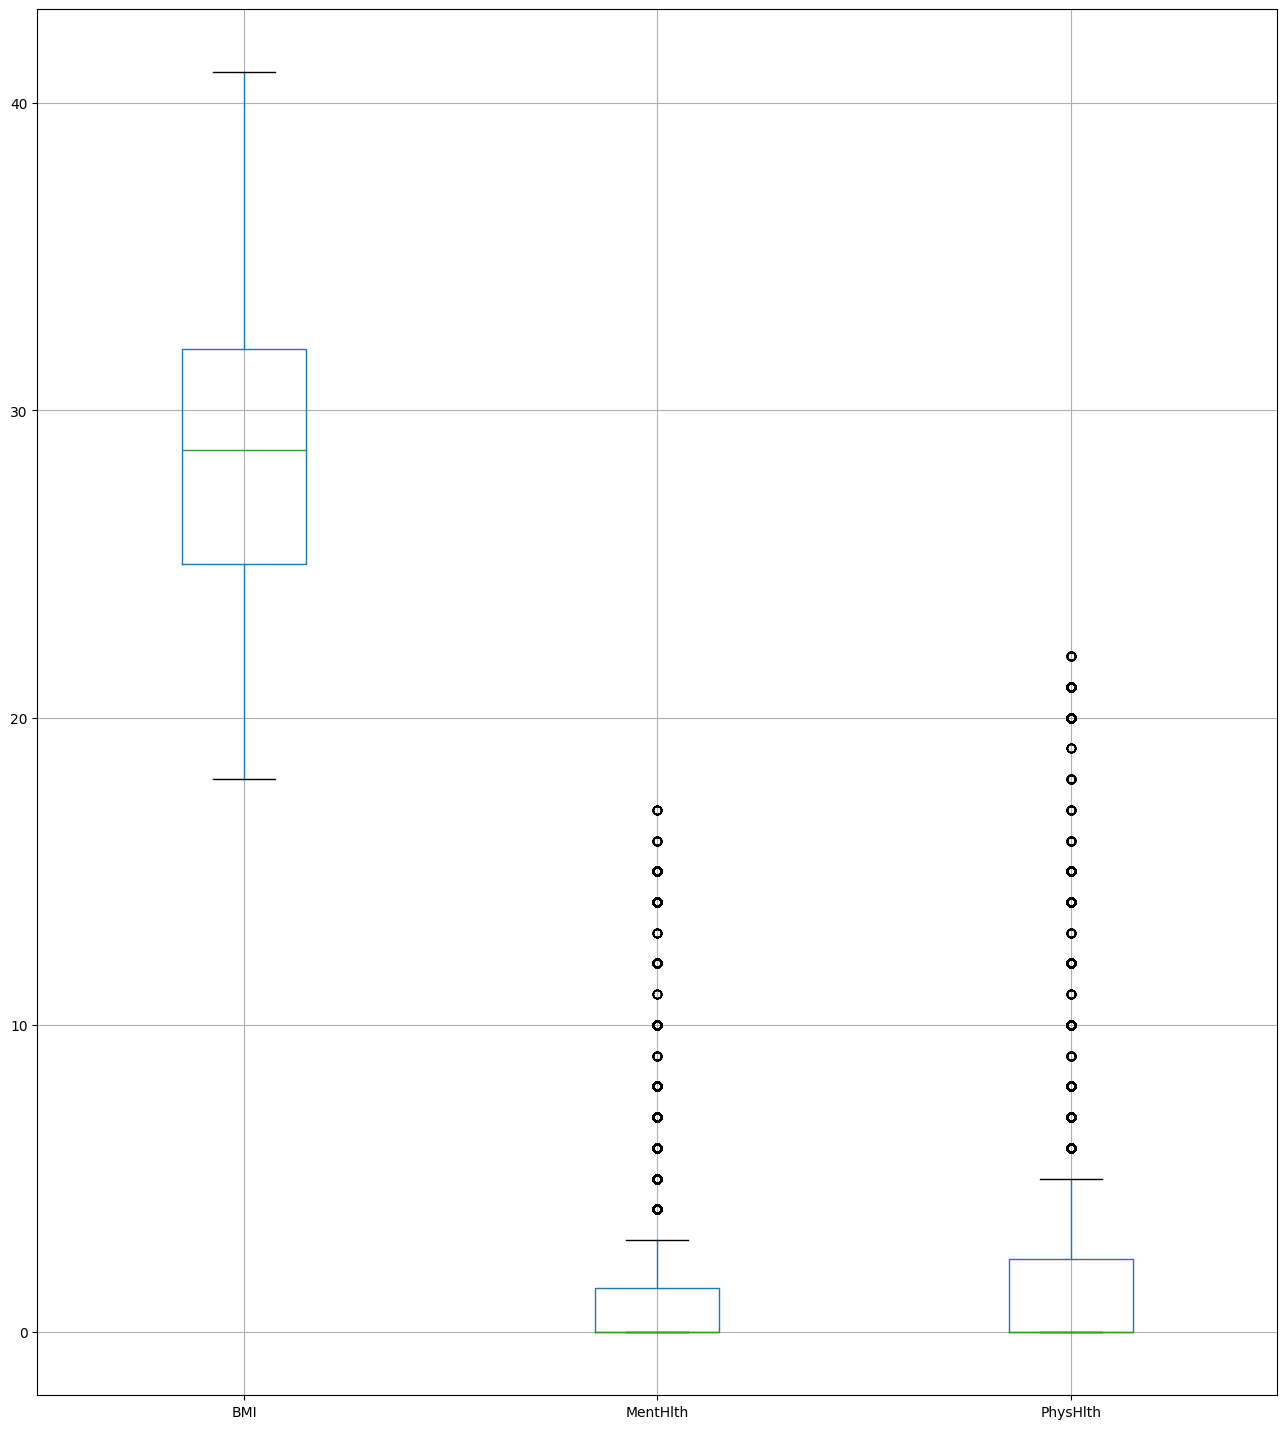

In [123]:
# Obtaining outlier tresholds.
mean_bmi=np.mean(bmi_col)
std_bmi=np.std(bmi_col)
tr_bmi= 1.7*std_bmi

mean_ph= np.mean(ph_col)
std_ph=np.std(ph_col)
tr_ph= 1.7*std_ph

mean_mh= np.mean(mh_col)
std_mh=np.std(mh_col)
tr_mh= 1.7*std_mh

# Identifying outliers

data_p_ol=data_p_nzv.copy()
data_p_ol.loc[:,'BMI'] = bmi_col[np.abs(bmi_col - mean_bmi) <= tr_bmi]
data_p_ol.loc[:,'PhysHlth'] = ph_col[np.abs(ph_col - mean_ph) <= tr_ph]
data_p_ol.loc[:,'MentHlth'] = mh_col[np.abs(mh_col - mean_mh) <= tr_mh]



# Filling any introduced NaN values
mean_bmi_u=np.nanmean(data_p_ol['BMI'])
mean_ph_u=np.nanmean(data_p_ol['PhysHlth'])
mean_mh_u=np.nanmean(data_p_ol['MentHlth'])

data_p_ol['BMI'].fillna(mean_bmi_u, inplace=True)
data_p_ol['PhysHlth'].fillna(mean_ph_u, inplace=True)
data_p_ol['MentHlth'].fillna(mean_mh_u, inplace=True)

# Checking variables after outlier removal

plt.figure(figsize=(16, 18))
data_p_ol[['BMI','MentHlth','PhysHlth']].boxplot()


BMI Outliers have been fixed, but MentHlth and PhysHlth outliers left will stay, otherwise, the variables do not seem to have almost any variance.

The data with fixed outliers is saved in data_p_ol referring to data past outliers.

<h3> Normalizing BMI Variable </h3>

In [126]:
# Normalizing BMI variable without outlier fix

bmi_c=data_p_nzv['BMI']
norm_bmi= normalize(bmi_c.values.reshape(1,-1)) # column into 2D array. -1 calculates the number of columns based on the original array.

# Changing BMI column into normalized values

data_p_nzv.loc[:,'BMI']= norm_bmi[0] # replace with first row of 2D array.

# Normalizing BMI variable with outlier fix

bmi_c_ol=data_p_ol['BMI']
norm_bmi_ol= normalize(bmi_c_ol.values.reshape(1,-1)) 

# changing BMI column into normalized values

data_p_ol.loc[:,'BMI']= norm_bmi_ol[0] # replace with first row of 2D array.


In [ ]:
# Standardizing Mental Health & Physical Health



From EDA the correlation of variables which could be removed to reduce redundancy:
- GenHealth & PhysHlth 0.55
- GenHealth & DiffWalking 0.48
- DiffWalk & PhysHlth 0.38

To assess the effects of removing Physical Health and Difficuly Walking variables, a new dataset without them is collected below:


Four ways of investigating important features will be:

- using decision trees to see which features are deemed important.
- using correlation obtained in EDA.
- using previous research and medical journals.

In [6]:
# splitting data
Ivs = diabetes.drop('Diabetes_binary', axis='columns')
DV = diabetes['Diabetes_binary']
print(DV.head())
print(Ivs.head())

0    0
1    0
2    0
3    0
4    0
Name: Diabetes_binary, dtype: int64
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         0          1   26       0       0                     0   
1       1         1          1   26       1       1                     0   
2       0         0          1   26       0       0                     0   
3       1         1          1   28       1       0                     0   
4       0         0          1   29       1       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             1       0        1  ...              1            0        3   
1             0       1        0  ...              1            0        3   
2             1       1        1  ...              1            0        1   
3             1       1        1  ...              1            0        3   
4             1       1        1  ...              1            0        2  

In [7]:
#importing the tree modelling library

from sklearn import tree

In [11]:
#Splitting data
from sklearn.model_selection import train_test_split

train_Ivs, test_Ivs, train_DV, test_DV = train_test_split(Ivs,DV,test_size=0.3,random_state=51)

In [182]:
#setting up initial model

model = tree.DecisionTreeClassifier()
classtree_noprune=model.fit(train_Ivs, train_DV)

In [183]:
optalpha = classtree.cost_complexity_pruning_path(train_Ivs,train_DV) #finding optimal pruning parameter alpha.
biggest=max(optalpha.ccp_alphas) # extracting highest alpha
medianalpha=np.median(optalpha.ccp_alphas) # extracting median alpha.
meanalpha=np.mean(optalpha.ccp_alphas) # average alpha


In [184]:
# specifying additional models with pruning parameters
model2 = tree.DecisionTreeClassifier(ccp_alpha=biggest)
model3 = tree.DecisionTreeClassifier(ccp_alpha=medianalpha)
model4 = tree.DecisionTreeClassifier(ccp_alpha=meanalpha)

In [185]:
classtree2=model2.fit(train_Ivs, train_DV)
classtree3=model3.fit(train_Ivs, train_DV)
classtree4=model4.fit(train_Ivs, train_DV)

In [190]:
# evaluating depth of each model
dep1=classtree_noprune.get_depth()
dep2=classtree2.get_depth()
dep3=classtree3.get_depth()
dep4=classtree4.get_depth()

#evaluating accuracy of each model
acc1=model.score(test_Ivs,test_DV)
acc2=model2.score(test_Ivs,test_DV)
acc3=model3.score(test_Ivs,test_DV)
acc4=model4.score(test_Ivs,test_DV)

print('model 1: alpha 0, depth {}, accuracy {}.'.format(dep1,acc1))
print('model 2: alpha {}, depth {}, accuracy {}.'.format(round(biggest,ndigits=2),dep2,acc2))
print('model 3: alpha {}, depth {}, accuracy {}.'.format(round(medianalpha,ndigits=2),dep3,acc3))
print('model 4: alpha {}, depth {}, accuracy {}.'.format(round(meanalpha,ndigits=2),dep4,acc4))

model 1: alpha 0, depth 38, accuracy 0.6564503960769521.
model 2: alpha 0.07, depth 0, accuracy 0.4976895511127876.
model 3: alpha 0.0, depth 34, accuracy 0.6828083741984157.
model 4: alpha 0.0, depth 16, accuracy 0.7381648434552999.


In [15]:
# Plotting important variables

import matplotlib.pyplot as plt

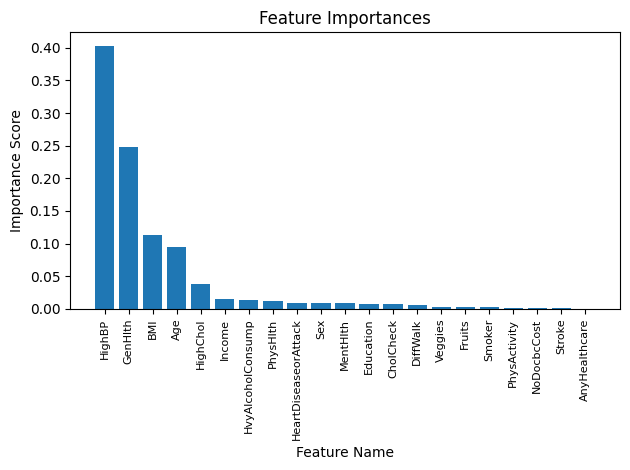

In [178]:
fnames = model4.feature_names_in_
importance = model4.feature_importances_
dfdata = pd.DataFrame({'feature': fnames, 'importance': importance})
sorted = dfdata.sort_values(by='importance',ascending=False)


plt.title("Feature Importances")
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.bar(sorted['feature'],sorted['importance'])
plt.xticks(rotation=90,size=8)
plt.tight_layout()

The most important variables here were:
- HighBP
- GenHlth
- BMI
- Age
- HighChol

Based on the correlation from EDA the features moving with the variable the most are:
- GenHlth
- HighBP
- BMI
- HighChol
- Age 
- DiffWalk

With a decision boundry of 0.21.